In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [15]:
rng = np.random.RandomState(10)

In [17]:
dataraw = pd.read_pickle('data/modeldata.pkl')
dataraw = dataraw.reset_index(drop=True)

In [18]:
dataraw.head()

,draftnbr,Age,height,FG%,3P%,avgPTS,avgMP,avgTRB,avgAST,avgVORP
0,1,19.0,6.833333,0.623,0.150,14.2,32.0,10.4,1.3,3.400000
1,2,19.0,6.583333,0.491,0.255,11.9,31.1,7.4,1.9,0.433333
2,3,19.0,6.416667,0.445,0.339,14.8,34.2,6.7,2.2,1.316667
3,4,21.0,6.333333,0.453,0.348,9.7,20.4,1.9,2.0,-0.312500
4,5,21.0,6.833333,0.525,0.500,9.8,18.7,7.3,1.0,-0.244444


In [70]:
trainX = dataraw[['draftnbr','avgVORP']]

In [131]:
isofor = IsolationForest(max_samples=998,random_state=rng)
isofor.fit(trainX)
predict = isofor.predict(trainX)
dataraw['outliers'] = predict

In [132]:
normal = dataraw[dataraw['outliers']==1]
abnormal = dataraw[dataraw['outliers']==-1]

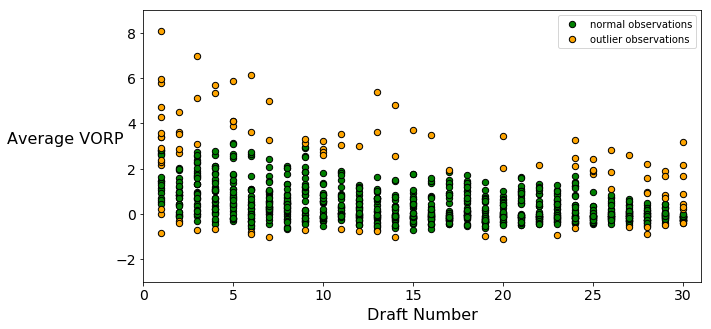

In [150]:
# plot the line, the samples, and the nearest vectors to the plane

plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(normal['draftnbr'], normal['avgVORP'], c='green',
                 s=40, edgecolor='k')
c = plt.scatter(abnormal['draftnbr'], abnormal['avgVORP'], c='orange',
                s=40, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 31))
plt.ylim((-3, 9))
plt.tick_params(axis = 'both',labelsize = 14)
plt.xlabel('Draft Number',fontsize = 16)
plt.ylabel('Average VORP',fontsize = 16,rotation = 0,labelpad=50)
plt.legend([b1, c],
           ["normal observations",
            "outlier observations"],
           loc="upper right");

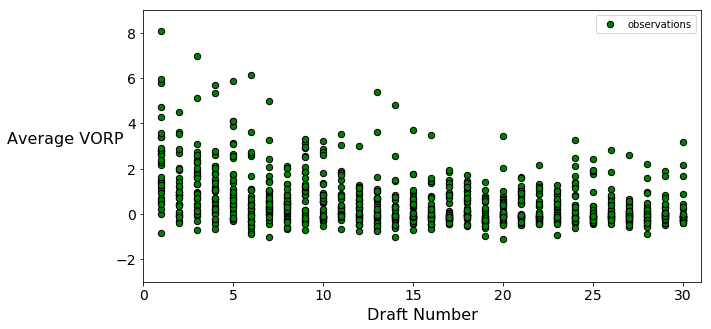

In [147]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(dataraw['draftnbr'], dataraw['avgVORP'], c='green',
                 s=40, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 31))
plt.ylim((-3, 9))
plt.tick_params(axis = 'both',labelsize = 14)
plt.xlabel('Draft Number',fontsize = 16)
plt.ylabel('Average VORP',fontsize = 16,rotation = 0,labelpad=50)
plt.legend([b1],
           ["observations"],
           loc="upper right");